# Анализ игровой индустрии

## Введение

Проект разрабатывается в интересах интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры.

Исходной информацией для выполнения проекта являются доступные из открытых источников исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. В ходе проекта необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В проекте рассматриваются данные до 2016 года.

Дата выполнения проекта - декабрь 2016 г.

Цель проекта - планирование рекламной кампании на 2017-й год. 

Описание данных games.csv

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы долларов)

EU_sales — продажи в Европе (миллионы долларов)

JP_sales — продажи в Японии (миллионы долларов)

Other_sales — продажи в других странах (миллионы долларов)

Critic_Score — оценка критиков (от 0 до 100)

User_Score — оценка пользователей (от 0 до 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## План работы

### Предобработка данных

 - Замена названий столбцов (приведение к нижнему регистру);
 - Преобрование данных в нужные типы;
 - Обработка пропусков;
 - Расчет суммарных продажи во всех регионах (с записью в отдельный столбец).
 
### Исследовательский анализ данных

 - Оценка количества игр, выпушенных в разные годы;
 - Оценка динамики продаж по платформам;
 - Выбор платформы с наибольшими суммарными продажами и построение распределения по годам;
 - Определение среднего времени жизни игровой платформы;
 - Определение релевантного периода для анализа;
 - Определение потенциально прибыльных платформ;
 - Оценка глобальных продаж каждой игры и разбивкой по платформам;
 - Оценка влияния отзывов пользователей и критиков на продажи внутри одной популярной платформы; 
 - Определение общего распределения игр по жанрам. 

### Описание портретов пользователей каждого региона

Определение для пользователя каждого региона (NA, EU, JP):

 - Самые популярные платформы (топ-5);
 - Самые популярные жанры (топ-5);
 - Влияние рейтинга ESRB на продажи в регионе.
 
### Исследование статистических показателей

 - Оценка динамики изменения пользовательского рейтинга и рейтинга критиков в различных жанрах;
 - Расчет средних значений, дисперсии и стандартного отклонения;

### Проверка гипотез

 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.



## 1. Предобработка данных

Импортируем необходимые библиотеки: Pandas, matplotlib, seaborn, scipy и numpy.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import numpy as np

Загружаем датасет

In [2]:
data = pd.read_csv('games.csv')

Взглянем на наш датасет

In [3]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Проанализируем общую информацию о датасете

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Столбцы name, platform, genre и rating включают в себя тектовые данные. Эти столбцы необходимо привести к стоковому типу str, а также привести значения к нижнему регистру.
Столбцы year_of_release, na_sales, eu_sales, jp_sales, other_sales, critic_score включают в себя данные числовые значения, чему соответствует тип данных float64 - изменения не требуются.
Особняком стоит столбец user_score - содержащий числовые значения, но имеющий тип object. Проверим содержание данного столбца.

In [5]:
data['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Из всех числовых значений выделяется одно текстовое "tbd" - от английского "to be determined", что означает "будет определен". 
Тем не менее, ждать этого мы не можем. Ведь анализировать данные нам необходимо прямо сейчас. 
Заменим значения "tbd" на пропуски и приведем столбец к типу данных float64.

In [6]:
data['User_Score'] = pd.to_numeric(data['User_Score'], errors = 'coerce')

Приведем названия столбцов к нижнему регистру

In [7]:
data.columns = data.columns.str.lower()

Изменим типы данных:
Для столбцов name, platform, genre и rating применим тип str. Это необходимо для последующей обработки данных столбцов в виде строк. Также приведем содержимое этих столбцов к нижнему регистру с целью дальнейшего поиска дубликатов.

In [8]:
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()
data['rating'] = data['rating'].str.lower()

Проведем исследование причин появления пропусков.

Определим строки, в которых отсутствует название игры 'name'.

In [9]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Таких строк оказалось всего 2 - их следует удалить из датафрейма. 

In [10]:
data.dropna(subset = ['name'], inplace = True)

Проверим значения, которые принимает столбец 'genre' на предмет некорректных названий жанров.

In [11]:
data['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy'], dtype=object)

Значения столбца 'genre' в порядке. 
Аналогичную проверку проведем с платформами.

In [12]:
data['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

Значения столбца 'platform' в порядке. 
Продолжим предобработку.

Проверим датасет на наличие дубликатов.

In [13]:
data.duplicated().sum()

0

Дубликатов не обнаружено!
Продолжаем предобработку. 

Расчитаем отношение количества игр с пропущенными значениями столбцов к их общему количеству за определенный год (далее - ratio).

Исследуем причины пропусков в столбце 'rating'. Проверим следующую гипотезу: с 1994 года значение ratio должно пойти на значительный спад в связи с основанием организации, выпускающей данный рейтинг.

Создадим функцию для построения гистограмм. 

In [112]:
def plot_diagram(x, y, title, x_label, y_label, color):
    fig, ax = plt.subplots()
    ax.bar(x, y) 
    ax.set_facecolor('seashell')
    fig.set_facecolor('floralwhite')
    fig.set_figwidth(12)    
    fig.set_figheight(6)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.bar(x, y, color = color)
    plt.show()

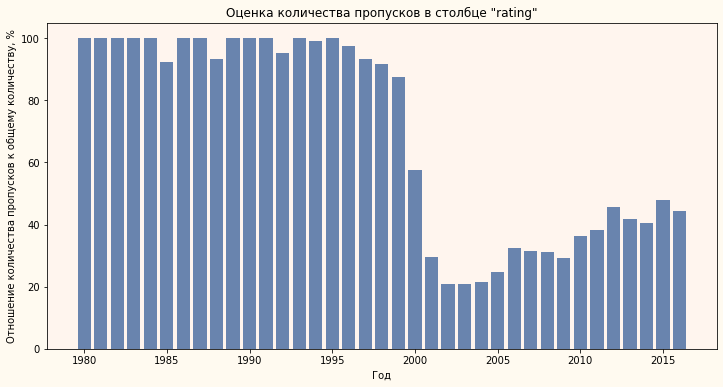

In [114]:
na_rating = data[data['rating'].isna()].loc[:, ['name', 'year_of_release']].groupby('year_of_release').count()
all_games = data.loc[:, ['name', 'year_of_release']].groupby('year_of_release').count()
na_rating['ratio'] = na_rating['name'] / all_games['name'] * 100
x1 = na_rating.index.tolist()
y1 = na_rating['ratio']

plot_diagram(x1,y1, 'Оценка количества пропусков в столбце "rating"', 'Год', 'Отношение количества пропусков к общему количеству, %', [105 / 256, 133 / 256, 175 / 256])

In [16]:
na_rating

,name,ratio
year_of_release,,
1980.0,9,100.000000
1981.0,46,100.000000
1982.0,36,100.000000
1983.0,17,100.000000
1984.0,14,100.000000
1985.0,13,92.857143
1986.0,21,100.000000
1987.0,16,100.000000
1988.0,14,93.333333


Гипотеза не подтвердилась. Резкий спад наблюдается лишь в 2000 году. Причиной тому оказалось создание
системы правоприменения ESRB, целью которой является наложение санкций к компаниям, которые не соблюдают правила и рекомендации ESRB.

Также любопытным оказались значения ratio не равные 100% до 1994 года. Проверим, какие игры из нашего датафрейма содержат значения в столбце 'rating' на примере 1988 года. 

In [17]:
data[data['year_of_release'] == 1988].dropna(subset = ['rating'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14621,simcity,pc,1988.0,simulation,0.0,0.02,0.0,0.01,64.0,2.2,e10+


Этой игрой оказалась simsity. Указанный в таблице рейтинг оказался корректным. Узнаем побольше из открытых источников про эту игру. Оказалось, что игра завоевала широкую популярность и не раз переиздавалась на различных платформах уже после 1994 года. 
Можем высказать предположение, что не 100% значение ratio до 1994 года связанно именно с переизданием некоторых игр.

Учитывая тот факт, что Entertainment Software Rating Board (ESRB) — организация, основное направление деятельности которой — принятие и определение рейтингов для компьютерных видеоигр в США и Канаде, можно сделать предположение, что для игр, не предназначенных для рынков Северной Америки не обязательно привоение данного рейтинга. Определим соотношение количества игр без рейтинга с нулевыми продажами по Североамериканскому региону к общему количеству игр без рейтинга начиная с 2000 года.

In [18]:
len(data[(data['na_sales'] == 0)&(data['rating'].isna())&(data['year_of_release'] >= 2000)]) / len(data[(data['rating'].isna())&(data['year_of_release'] >= 2000)])

0.6270022883295194

Из результатов расчета получаем вывод: более 62% игр без рейтинга не распространяются на территории Северной Америки. Для оставшихся 38% можно выдвинуть следующее предположение: проекты, которые распространяются исключительно в цифровом виде, получают рейтинг в системе IARC. Однако проверить данное предположение на имеющемся датасете не представляется возможным.

Исследуем причины пропусков в столбце 'user_score'. Проверим следующую гипотезу: с 1989 года значение ratio будет снижаться в связи с тем, что в этом году был реализован проект Всемирной паутины.

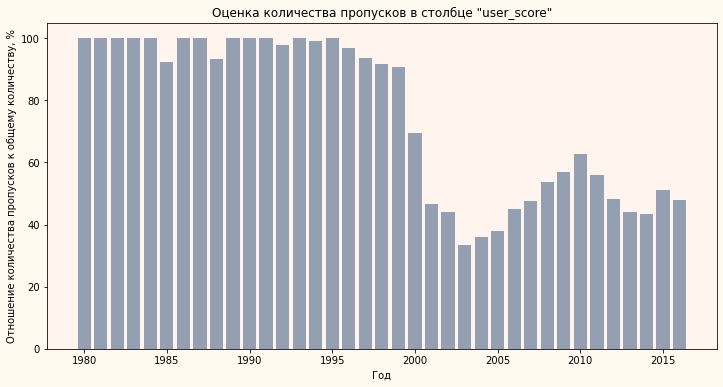

In [115]:
na_user_score = data[data['user_score'].isna()].loc[:, ['name', 'year_of_release']].groupby('year_of_release').count()
na_user_score['ratio'] = na_user_score['name'] / all_games['name'] * 100
x2 = na_user_score.index.tolist()
y2 = na_user_score['ratio']
plot_diagram(x2,y2,'Оценка количества пропусков в столбце "user_score"', 'Год', 'Отношение количества пропусков к общему количеству, %', [149 / 256, 160 / 256, 178 / 256])

Выдвинутая гипотеза не поддтвердилась. Значение ratio начинает резкое снижение в 2000 году. Возможно, это связано со следующим фактом: Захват Интернетом сферы глобальной связи по историческим меркам был практически моментальным - в 1993 году он передавал лишь 1 % информации, проходящей через двусторонние телекоммуникационные сети, а уже в 2000 году - 51 %.

Исследуем причины пропусков в столбце 'critic_score'. 

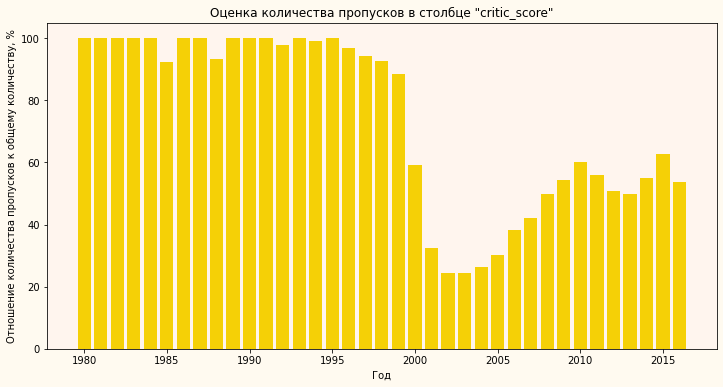

In [116]:
na_critic_score = data[data['critic_score'].isna()].loc[:, ['name', 'year_of_release']].groupby('year_of_release').count()
na_critic_score['ratio'] = na_critic_score['name'] / all_games['name'] * 100
x3 = na_critic_score.index.tolist()
y3 = na_critic_score['ratio']

plot_diagram(x3,y3,'Оценка количества пропусков в столбце "critic_score"', 'Год', 'Отношение количества пропусков к общему количеству, %', [246 / 256, 209 / 256, 6 / 256])

Выводы по пропускам в столбце critic_score аналогичны столбцу users_score. Количество пропусков данных значений уменьшается по мере развития и доступности интернета.

Вновь проанализируем общую информацию о датасете.

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Пропуски в столцах 'na_sales', 'eu_sales', 'jp_sales', 'other_sales' отстутствуют. 
Пропуски в столбце 'year_of_release' проигнорируем. 

Создадим новый стобец, в который внесем данные о суммарных продажах во всех регионах. 

In [22]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Посмотрим на результаты проведенной предобработки:

In [23]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


### Выводы разделу:

1. Названия и содержание столбцов приведены к нижнему регистру.
2. Дубликатов в датасете не обнаружено.
3. Изменены типы данных для столбцов name, platform, genre и rating на тип str.
4. Для столбца 'user_score' проведена замена значений 'tbd' на пропуски. Тип данных изменен на float64.
5. Строки с пропусками в столбце 'name' удалены.
6. Пропуски в столбце 'rating' возникают как минимум по причине необязательного присваивания рейтинга для игр: выпущенных до 2000 года; не реализуемых на территории Северной Америки; распространяемых исключительно в цифровом формате.  Пропуски заменам не подвергались, строки с пропусками не удалялись.
7. Пропуски в столбцах 'user_score' и 'critic_score' до 2000 года обусловлены слабым развитием сети интернет. В общем виде же пропуски могут быть обусловлены низкой популярностью игр. Пропуски заменам не подвергались, строки с пропусками не удалялись;
8. Пропуски в столцах 'na_sales', 'eu_sales', 'jp_sales', 'other_sales' отстутствуют.
9. В столбце 'year_of_release' пропуски заменам не подвергались, строки с пропусками не удалялись.
10. В датафрейм добавлен столбец с суммарными продажами во всех регионах. 

## 2. Исследовательский анализ данных

Рассчитаем количество игр, выпускаемых в разные годы.

In [24]:
games_count = data.loc[:, ['name', 'year_of_release']].groupby('year_of_release').count()
games_count

,name
year_of_release,
1980.0,9
1981.0,46
1982.0,36
1983.0,17
1984.0,14
1985.0,14
1986.0,21
1987.0,16
1988.0,15


Проиллюстрируем полученный результат диаграммой.

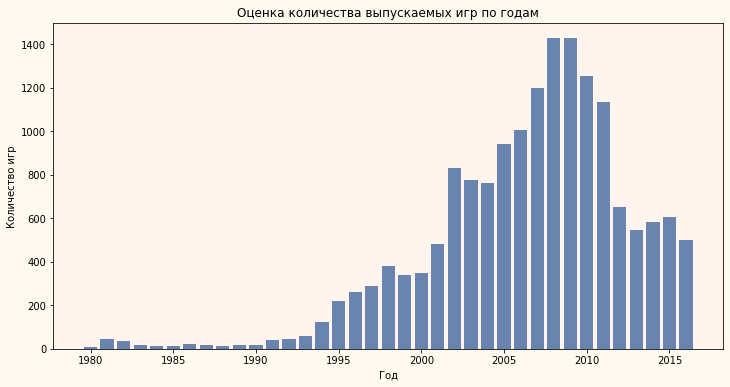

In [117]:
x4 = games_count.index.tolist()
y4 = games_count['name']

plot_diagram(x4,y4,'Оценка количества выпускаемых игр по годам', 'Год', 'Количество игр', [105 / 256, 133 / 256, 175 / 256])

Проведенный анализ показал, что до 1993 года выпоскалось небольшое количество игр (не более 60 в год). Начиная с 1994 года количество выпускаемых в год игр начинает местами постепенно (1995-2001 гг. и 2002-2009 гг.), а местами и довольно резко (1994-1995 гг. и 2001-2002 гг.) увеличиваться. Начиная с 2011 года количество выпускаемых в год игр начинает стремительно снижаться. Количество игр выпущеных в 2015 году сопостовимо с показателями 2001 года, и более чем в два раза меньше пика значений 2008 года. 

В 2010-е года миниатюризация аппаратного обеспечения и массовое распространение мобильных телефонов способствовало появлению мобильных игровых приложений; появилось направление создания игр для социальных сетей. Эти направления в некотором смысле обесценили понятие "видеоигра", чем и можно объяснить спад в 2011 году. 

Очевидно, что для планирования ни в коем случае не следует ориентироваться по данным за все года. Это обусловлено как минимум устареванием игровых платформ. 

Определим игровые платформы с наибольшими суммарными продажами. 

In [26]:
platform_sales = data.loc[:, ['platform', 'total_sales']].groupby('platform').sum().sort_values('total_sales', ascending = False)
platform_sales

,total_sales
platform,
ps2,1255.77
x360,971.42
ps3,939.65
wii,907.51
ds,806.12
ps,730.86
gba,317.85
ps4,314.14
psp,294.05


В тройке лидеров оказались платформы Sony Playstation 2, Nintendo DS и Sony Playstation 3. Рассмотрим подробнее распределение продаж игр для данных платформ по годам.

Построим диаграмму для Sony Playsatation 2.

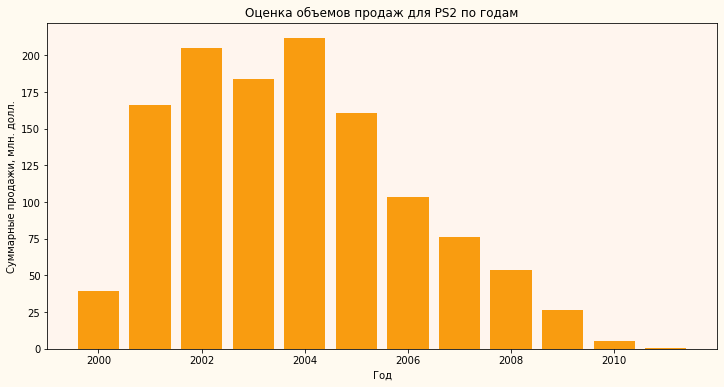

In [118]:
ps2_data = data[data['platform']=='ps2'].loc[:, ['year_of_release', 'total_sales']].groupby('year_of_release').sum()
x5 = ps2_data.index.tolist()
y5 = ps2_data['total_sales']

plot_diagram(x5,y5,'Оценка объемов продаж для PS2 по годам', 'Год', 'Суммарные продажи, млн. долл.', [250 / 256, 157 / 256, 16 / 256])

Построим диаграмму для Nintendo DS.

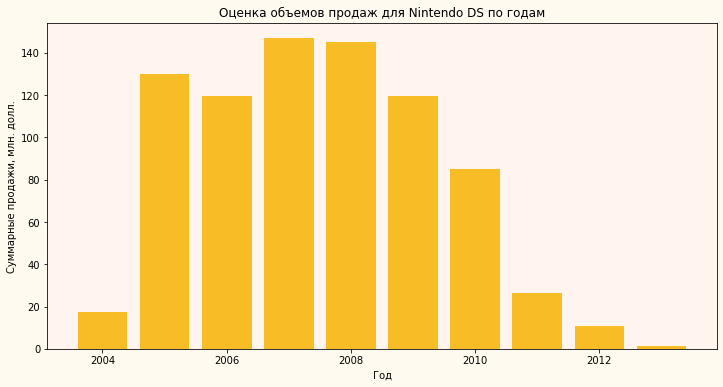

In [119]:
ds_data = data[data['platform']=='ds'].loc[:, ['year_of_release', 'total_sales']].groupby('year_of_release').sum()

x6 = ds_data.index.tolist()
y6 = ds_data['total_sales']

plot_diagram(x6,y6,'Оценка объемов продаж для Nintendo DS по годам', 'Год', 'Суммарные продажи, млн. долл.', [249 / 256, 189 / 256, 39 / 256]) 

Построим диаграмму для Sony Playsatation 3.

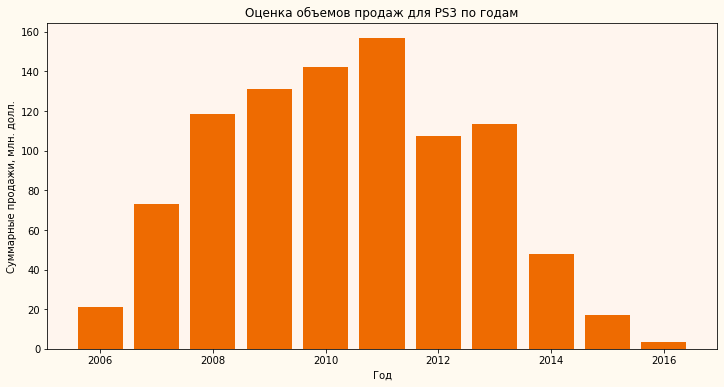

In [120]:
ps3_data = data[data['platform']=='ps3'].loc[:, ['year_of_release', 'total_sales']].groupby('year_of_release').sum()
x7 = ps3_data.index.tolist()
y7 = ps3_data['total_sales']

plot_diagram(x7,y7,'Оценка объемов продаж для PS3 по годам', 'Год', 'Суммарные продажи, млн. долл.', [239 / 256, 107 / 256, 1 / 256]) 

Анализ диаграмм приводит нас к следующему выводу: время жизни одной консоли составляет приблизительно 10 лет, т.е. игры для одной платформы выпускаются в рамках этого периода. 

Проведем аналитический расчет времени жизни каждой игровой платформы. 

In [30]:
platform_lifetime = pd.DataFrame(columns = ['platform','year_of_release_min', 'year_of_release_max','lifetime'])
platforms = data['platform'].unique().tolist()
platform_lifetime['platform'] = platforms

In [31]:
for i in range(len(platform_lifetime['platform'])):
    iter_data_lifetime = data[data['platform'] == platform_lifetime['platform'][i]]
    platform_lifetime.loc[[i],['year_of_release_min']] = min(iter_data_lifetime['year_of_release'])
    platform_lifetime.loc[[i],['year_of_release_max']] = max(iter_data_lifetime['year_of_release'])
platform_lifetime['lifetime'] =  platform_lifetime['year_of_release_max'] - platform_lifetime['year_of_release_min'] + 1
platform_lifetime                                                                                                                 

,platform,year_of_release_min,year_of_release_max,lifetime
0,wii,2006.0,2016.0,11.0
1,nes,1983.0,1994.0,12.0
2,gb,1988.0,2001.0,14.0
3,ds,1985.0,2013.0,29.0
4,x360,2005.0,2016.0,12.0
5,ps3,2006.0,2016.0,11.0
6,ps2,2000.0,2011.0,12.0
7,snes,1990.0,1999.0,10.0
8,gba,2000.0,2007.0,8.0
9,ps4,2013.0,2016.0,4.0


Исключим из расчета актуальные для 2016 года игровые платформы. 

In [32]:
platform_lifetime = platform_lifetime[platform_lifetime['year_of_release_max']<2016]
platform_lifetime.sort_values('lifetime')

,platform,year_of_release_min,year_of_release_max,lifetime
30,pcfx,1996.0,1996.0,1.0
27,tg16,1995.0,1995.0,1.0
29,gg,1992.0,1992.0,1.0
28,3do,1994.0,1995.0,2.0
24,scd,1993.0,1994.0,2.0
25,ws,1999.0,2001.0,3.0
26,ng,1993.0,1996.0,4.0
20,gen,1990.0,1994.0,5.0
23,sat,1994.0,1999.0,6.0
11,n64,1996.0,2002.0,7.0


Подозрительными кажутся значения времени жизни меньше 5 лет. Ручной поиск информации по данным платформам показал, что преимущественно эти платформы не были коммерчески успешными по тем или иным причинам (например, не выдержали конкуренции с более популярными брендами). Исключим их из расчета. 

Также подозрительным является время жизни Nintendo DS, вышедшей в 2004 году. Предполагается наличие некорректного значения в датафрейме. Проверим.

In [33]:
ds_data = data[data['platform'] == 'ds'].groupby('year_of_release').count()
ds_data

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
year_of_release,,,,,,,,,,,
1985.0,1,1,1,1,1,1,1,0,0,0,1
2004.0,23,23,23,23,23,23,23,11,11,12,23
2005.0,118,118,118,118,118,118,118,74,59,78,118
2006.0,201,201,201,201,201,201,201,95,81,117,201
2007.0,376,376,376,376,376,376,376,161,115,219,376
2008.0,492,492,492,492,492,492,492,184,121,302,492
2009.0,403,403,403,403,403,403,403,107,77,259,403
2010.0,323,323,323,323,323,323,323,56,35,179,323
2011.0,153,153,153,153,153,153,153,19,10,74,153


Обнаружен выброс!

In [34]:
data[(data['year_of_release'] == 1985)&(data['platform'] == 'ds')]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,strongest tokyo university shogi ds,ds,1985.0,action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


Действительно, по данным из сети - эта игра действительно существует и вышла в 1985 году. Скорее всего это ее переиздание для платформы Nintendo DS. Заменим год выхода данной игры на 2004.

In [35]:
data.loc[15957,'year_of_release'] = 2004

In [36]:
platform_lifetime_1 = platform_lifetime[platform_lifetime['lifetime']>=5].copy()
platform_lifetime_1['year_of_release_min'][3] = 2004
platform_lifetime_1['lifetime'] = platform_lifetime_1['year_of_release_max'] - platform_lifetime_1['year_of_release_min'] +1

In [37]:
platform_lifetime_1.sort_values('lifetime')

,platform,year_of_release_min,year_of_release_max,lifetime
20,gen,1990.0,1994.0,5.0
23,sat,1994.0,1999.0,6.0
11,n64,1996.0,2002.0,7.0
19,gc,2001.0,2007.0,7.0
8,gba,2000.0,2007.0,8.0
13,xb,2000.0,2008.0,9.0
3,ds,2004,2013.0,10.0
7,snes,1990.0,1999.0,10.0
12,ps,1994.0,2003.0,10.0
15,2600,1980.0,1989.0,10.0


Теперь можем смело рассчитать среднее время жизни игровой платформы.

In [38]:
np.mean(platform_lifetime_1['lifetime']) 

9.533333333333333

Таким образом, аналитический расчет подтвердил выводы по графикам - среднее время жизни игровой платформы 10 лет (9.53 лет - если быть немного точнее).

Также проведен дополнительный анализ времени появления новых консолей на примере Sony Playstation:

PS1 - 1994 год

PS2 - 2000 год

PS3 - 2006 год

PS4 - 2016 год

PS5 - 2020 год (заглянули в будущее относительно 2016 года)

Таким образом, смена поколений платформ происходит за 6-7 лет. 

Определим актуальные для 2016 года игровые платформы.

In [39]:
platforms_2016 = data[data['year_of_release'] == 2016]['platform'].unique().tolist()
platforms_2016

['ps4', '3ds', 'xone', 'wiiu', 'ps3', 'pc', 'x360', 'psv', 'wii']

Все платформы можно условно разделить на три группы: ПК, мобильные и стационарные консоли. 

Очевидно, что игры для ПК практически не теряют актуальности, следовательно - не стоит вводить ограничений по данной платформе. 

Рассмотрим даты выпуска актуальных в 2016 году игровых платформ:

Sony Playstation 4 - 2016 год

Nintendo 3DS - 2011 год

Microsoft Xbox One - 2013 год

Nintendo Wii U - 2012 год

Sony Playstation 3 - 2006 год

Microsoft Xbox 360 - 2005 год

Sony Playstation Vita - 2011 год

Nintendo Wii - 2006 год 

Наиболее старыми платформами оказались Sony Playstation 3 (2006 год), Nintendo Wii (2006 год) и Microsoft Xbox 360 (2005 год). Учитывая рассчитаное ранее время жизни игровой платформы (10 лет) можно предположить, что эти платформы по состоянию на 2016 год устарели, и в 2017 году для них не будут выпускаться большое количество игр.  

Из отставшихся игровых платформ наиболее старшими являются портативные консоли Nintendo 3DS и Sony Playstation Vita (2011 год). Опять же, имея вввиду рассчитанное время жизни, поддержка данных консолей, а также консолей выпущенных позже, продолжится приблизительно до 2020 года. 

Для дальнейшего анализа следует учитывать игры, вышедшие в 2011 году и позже. 

Преобразуем исходный датасет, оставив в нем игровые платформы, актуальные на 2016 год. Также иключим данные до 2011 года. 

In [40]:
data_platforms_2016 = data[(data['platform'].isin(platforms_2016))&(data['year_of_release']>= 2011)]
data_platforms_2016

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013.0,action,7.02,9.09,0.98,3.96,97.0,8.2,m,21.05
23,grand theft auto v,x360,2013.0,action,9.66,5.14,0.06,1.41,97.0,8.1,m,16.27
29,call of duty: modern warfare 3,x360,2011.0,shooter,9.04,4.24,0.13,1.32,88.0,3.4,m,14.73
31,call of duty: black ops 3,ps4,2015.0,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,pokemon x/pokemon y,3ds,2013.0,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,aiyoku no eustia,psv,2014.0,misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


Определим доходность платформ.

In [41]:
sales_platforms_2016 = data_platforms_2016.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
sales_platforms_2016

,total_sales
platform,
ps3,445.57
x360,380.38
ps4,314.14
3ds,257.81
xone,159.32
pc,97.68
wii,95.02
wiiu,82.19
psv,53.81


Наиболее прибыльными платформами оказались Microsoft Xbox 360, Sony PlayStation 3 и Sony PlayStation 4. Однако данные консоли вышли довольно давно. Рассмотрим распределение выручки по годам для актуальных платформ.

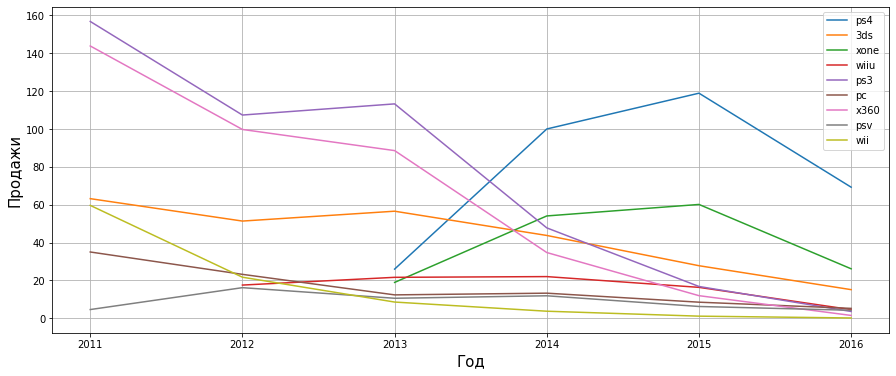

In [42]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
for i in platforms_2016:
    plot_data = data_platforms_2016[data_platforms_2016['platform']==i].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    
    y = plot_data['total_sales']
    plt.plot(y, label=i)
plt.xlabel('Год', fontsize=15, color='black')
plt.ylabel('Продажи', fontsize=15, color='black')
plt.legend()
plt.grid(True)  


Несмотря на то, что озвученные выше платформы были наиболее прибыльными, в 2017 году не стоит делать ставку именно на них. По данным за 2014-2016 года по продажам лидируют Sony Playstation 4, Microsoft Xbox One и Nintendo 3DS. Учтем тот факт, что данные за 2016 год предоставлены не в полном объеме и вполне могут измениться. Тогда можем заметить, что для Sony Playstation 4 и Microsoft Xbox One кривая до 2016 года имеет восходящий тренд, и продажи игр для данных платформ в будущем могут принести хороший результат. Кривая продаж для Nintendo 3DS напротив имеет нисходящий тренд. 

Опишем продажи игр по данным нового датасета. 

In [43]:
data_platforms_2016['total_sales'].describe()

count    3519.000000
mean        0.535925
std         1.287253
min         0.010000
25%         0.050000
50%         0.150000
75%         0.470000
max        21.050000
Name: total_sales, dtype: float64

Построим ящик с усами для продаж игр с разбивкой по платформам, актуальным на 2016 год.

Text(0, 0.5, 'Глобальные продажи')

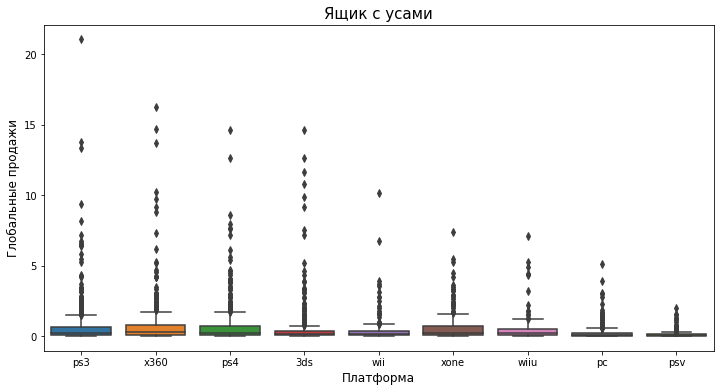

In [44]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data_platforms_2016, x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)

Так как мы имеем дело с выбросами, рассмотрим график в большем масштабе. Ограничим суммарные продажи 'total_sales' < 1.5

Text(0, 0.5, 'Глобальные продажи')

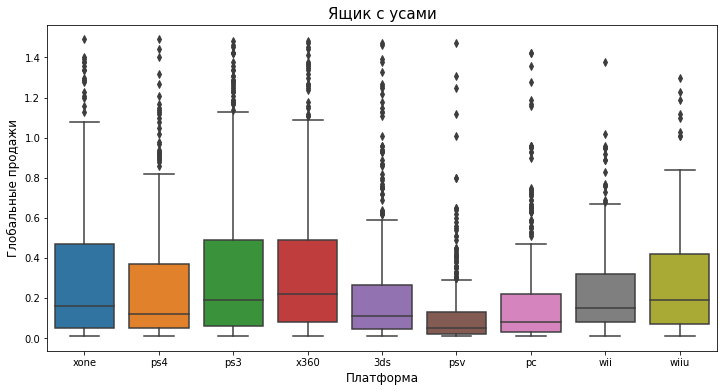

In [45]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data_platforms_2016[data_platforms_2016['total_sales']<1.5], x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)

Медианные значения для топовых платформ от Microsoft и Sony варьируются от 0,15 до 0,24 миллионов долларов. 
Верхняя граница предела, определяющего аномальные значения для Xbox (One и 360) составляет 1,2 миллиона долларов. Для Sony Playstation 3 - 1,4 миллиона долларов, для Playstation 4 - 1 миллион долларов.

Величину разброса между 1-м и 3-м квартилями можно объяснить популярностью игровой платформы. Чем попупулярнее платформа, тем больше она привлекает лучших разработчиков, выпускающих наиболее продающиеся игры, тем выше 3-й квартиль. Опять же, популярная платформа привлекает большее число разработчиков, в том числе выпускающих некачественные и непопулярные игры - этим объясняется положение 1-го квартиля на уровне нетоповых платформ. Логика работает и от обратного:для непопулярных платформ малый разброс объясняется малым интересом разработчиков и низким спросом от пользователей. 

Определим влияние отзывов пользователей и критиков на продажи игр. Для примера рассмотрим платформу Sony Playstation 3. Данная платформа уже прошла свой полный жизненный цикл, что позволяет нам считать данные по ней более достоверными. 

In [46]:
ps3 = data_platforms_2016[data_platforms_2016['platform']=='ps3']
ps3

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013.0,action,7.02,9.09,0.98,3.96,97.0,8.2,m,21.05
34,call of duty: black ops ii,ps3,2012.0,shooter,4.99,5.73,0.65,2.42,83.0,5.3,m,13.79
37,call of duty: modern warfare 3,ps3,2011.0,shooter,5.54,5.73,0.49,1.57,88.0,3.2,m,13.33
69,call of duty: ghosts,ps3,2013.0,shooter,4.10,3.63,0.38,1.25,71.0,2.6,m,9.36
81,fifa soccer 13,ps3,2012.0,action,1.06,5.01,0.13,1.97,88.0,6.6,e,8.17
...,...,...,...,...,...,...,...,...,...,...,...,...
16628,akatsuki no goei trinity,ps3,2012.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16638,tour de france 2014,ps3,2014.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,e,0.01
16674,tsukigime ranko's longest day,ps3,2014.0,action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16691,dynasty warriors: eiketsuden,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


Проведем расчет корреляции между отзывами критиков и суммарными продажами. 

In [47]:
ps3['critic_score'].corr(ps3['total_sales'])

0.38011114718290767

Построим диаграмму рассеяния для данной зависимости.

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

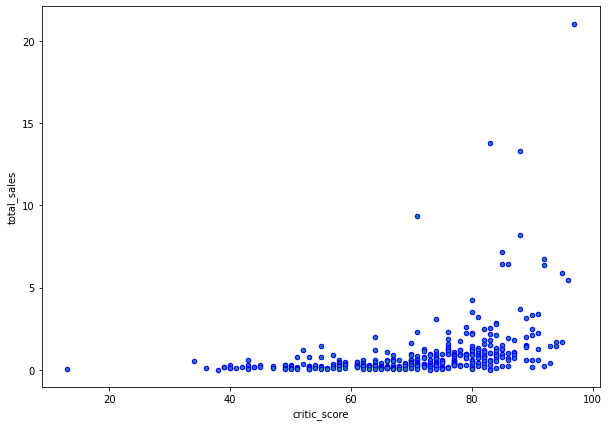

In [48]:
ps3.plot(kind='scatter', x='critic_score', y='total_sales', ec='blue', figsize=(10,7))

Результаты расчета показали, что рейтинг критиков оказывает положительное влияние на уровни продаж. Чем выше рейтинг - тем выше продажи. Коэффициент корреляции - 0,38.

Аналогичный расчет проведем для зависимости продаж от пользовательского рейтинга. 

Коэффициент корреляции:

In [49]:
ps3['user_score'].corr(ps3['total_sales'])

0.014089348308019415

Диаграмма рассеяния:

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

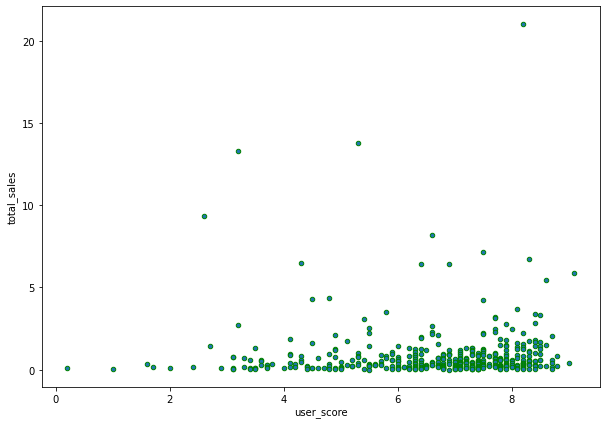

In [50]:
ps3.plot(kind='scatter', x='user_score', y='total_sales', ec='green', figsize=(10,7))

Расчеты показали слабую положительную зависимость уровня продаж от пользовательского рейтинга. Коэффициент корреляции - 0,014.

Построим матрицу корреляции.

<AxesSubplot:>

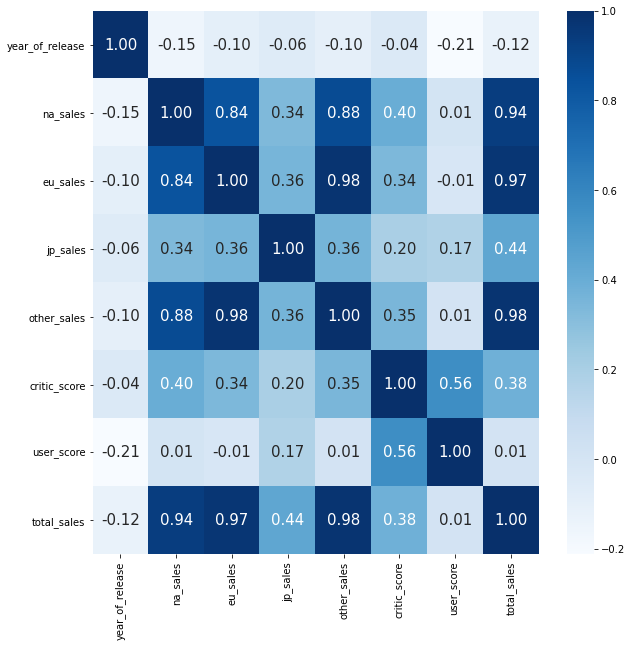

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(ps3.corr(), annot=True, cmap="Blues", fmt='.2f', annot_kws={'size':15})

Проведенные расчеты позволяют сделать следующие выводы:

1. Наибольшее влияние на продажи оценки критиков оказывают в Северной Америке. Наименьшее - в Японии.
2. Оценки пользователей в Японии оказывают наибольшее влияние на продажи, при этом в Европе и Северной Америке практически не оказывают. 
3. Влияние оценок вполне логично. Оценки критиков появляются до поступления игр в продажу, тем самым повышая или понижая интерес к игре. Оценки же пользователей появляются после покупки игры этим пользователями. Следовательно, оценки пользователей влияют на меньшую аудиторию, нежели оценки критиков, чем и объясняется меньшее влияние пользовательского рейтинга на продажи. 

Рассчитаем коэффициенты корреляции для каждой платформы, актуальной для 2016 года. 

In [52]:
corr_data = pd.DataFrame(columns = ['platform', 'critic_corr','user_corr'])
corr_data['platform'] = platforms_2016
for index, row in corr_data.iterrows():
    platform_data = data_platforms_2016[data_platforms_2016['platform'] == row['platform']]
    row['critic_corr'] = round(platform_data['critic_score'].corr(platform_data['total_sales']), 2)
    row['user_corr'] = round(platform_data['user_score'].corr(platform_data['total_sales']), 2)

In [53]:
corr_data

,platform,critic_corr,user_corr
0,ps4,0.41,-0.03
1,3ds,0.35,0.22
2,xone,0.42,-0.07
3,wiiu,0.35,0.4
4,ps3,0.38,0.01
5,pc,0.31,-0.05
6,x360,0.39,0.04
7,psv,0.13,0.01
8,wii,0.29,0.15


Проанализируем полученные данные. 

1. Рейтинг критиков во всех случаях оказывает большее влияние на продажи чем пользовательский рейтинг. Исключение - Nintendo Wiiu. Так как данная платформа наибольшей популярностью пользуется в Японии - исключение можно объяснить высоким коэффициентом корреляции между продажами и пользовательским рейтингом у Японских игроков, отмеченного выше в матрице корреляции для PS3. 
2. Коэффициент корреляции для оценок критиков практически во всех случаях имеет один порядок (0,35-0,43). Выделяются платформы PC (0,31), Nintendo Wii (0,29) и Sony Playstation Vita (0,13).
3. Коэффициет корреляции между продажами и пользовательским рейтингом у Sony Playstation 4 и Microsoft Xbox One отрицательный и близок к нулю. Такой результат можно объяснить недавним выходом данных платформ: небольшое количество пользователей использует данные платформы, еще меньшее их число дает оценки играм и тем более меньшее число пользователей ориентируется на данные оценки.
4. Коэффициет корреляции между продажами и пользовательским рейтингом у Sony Playstation 3, Microsoft Xbox 360,Nintendo Wiiu и Wii ненулевой и положительный, что может свидетельствовать о том, что пользователи ориентируются на мнения других игроков при покупке игр. 
5. Коэффициет корреляции между продажами и пользовательским рейтингом у Sony Playstation Vita и PC близки к нулевым значениям. 
6. Низкие значения коэффициентов корреляции между рейтингами и продажами для Sony Playstation Vita можно объяснить ограниченным количеством игр для данной платформы. У пользователя с ограниченным выбором отстутсвует возможность отклонить покупку игры из-за ее рейтинга. 

Проанализируем жанровый состав игр.
Составим датафрейм с сортировкой по жанрам. Включим в него суммарные продажи и количество игр.

In [54]:
genre_data = data_platforms_2016.pivot_table(index='genre', values=['total_sales'], aggfunc=['count','sum'])
genre_data.columns = ['game_count','total_sales']
genre_data = genre_data.sort_values('total_sales', ascending = False)
genre_data

,game_count,total_sales
genre,,
action,1144,542.84
shooter,326,402.60
sports,358,232.69
role-playing,392,226.82
misc,314,130.16
racing,176,86.70
platform,111,86.45
fighting,145,64.20
simulation,122,48.05


Построим диаграмму, отражающую суммарные продажи по жанрам.

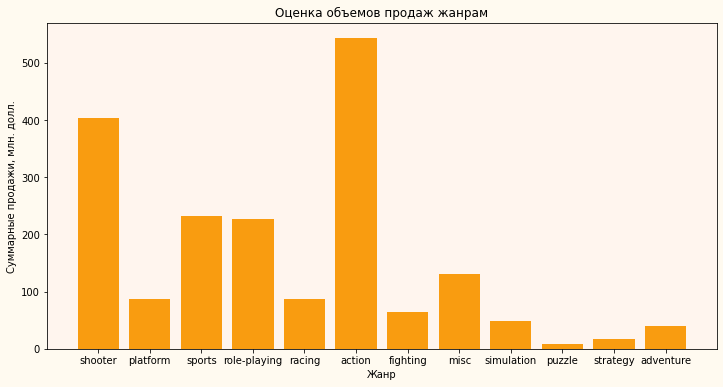

In [121]:
x8 = genre_data.index.tolist()
y8 = genre_data['total_sales']
plot_diagram(x8,y8,'Оценка объемов продаж жанрам', 'Жанр', 'Суммарные продажи, млн. долл.', [250 / 256, 157 / 256, 16 / 256]) 

Расчеты показали, что наиболее прибыльными жанрами являются "Action", "Shooter" и "Sports".

Построим диаграмму, отражающую суммарное количество игр по жанрам.

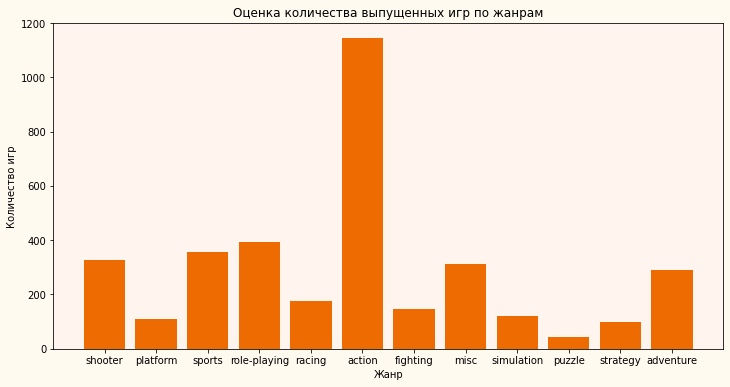

In [122]:
x9 = genre_data.index.tolist()
y9 = genre_data['game_count']
plot_diagram(x9,y9,'Оценка количества выпущенных игр по жанрам', 'Жанр', 'Количество игр', [239 / 256, 107 / 256, 1 / 256]) 

У наиболее прибльного жанра "Action" оказалось и наибольшее количество выпущенных игр. Интересным является тот факт, что жанр является "Shooter" прибыльнее жанра "Sports", однако количество игр с жанром "Shooter" оказалось меньше. 

Чтобы более детально проанализировать этот факт, проведем дополнительные расчеты.

Добавим в новый датафрейм данные о средних продажах, приходящихся на одну игру жанра. 

In [57]:
genre_data['mean_value'] = genre_data['total_sales'] / genre_data['game_count']
genre_data = genre_data.sort_values('mean_value', ascending = False)
genre_data

,game_count,total_sales,mean_value
genre,,,
shooter,326,402.60,1.234969
platform,111,86.45,0.778829
sports,358,232.69,0.649972
role-playing,392,226.82,0.578622
racing,176,86.70,0.492614
action,1144,542.84,0.474510
fighting,145,64.20,0.442759
misc,314,130.16,0.414522
simulation,122,48.05,0.393852


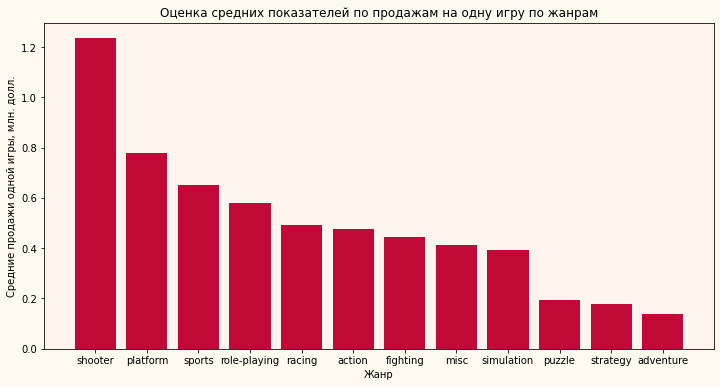

In [123]:
x10 = genre_data.index.tolist()
y10 = genre_data['mean_value']
plot_diagram(x10,y10,'Оценка средних показателей по продажам на одну игру по жанрам', 'Жанр', 'Средние продажи одной игры, млн. долл.', [194 / 256, 9 / 256, 55 / 256]) 

Проведенные расчеты позволяют сделать следующие выводы:

1. Наиболее прибыльными жанрами являются "Action", "Shooter" и "Sports".
2. Жанр "Action" является наиболее прибыльным за счет большего количества выпускаемых игр. При этом более низкий показатель средних продаж наталкивает на мысль о более плохом качестве игр данного жанра. 
3. Жанры "Shooter" и "Sports" занимют ведущие позиции как по выручке в целом, так и по удельному показателю на одну игру.
4. Из общей картины выделяется жанр "Platform" с довольно высокими показателями продаж при относительно малом количестве выпускаемых игр.

### Выводы по разделу:

1. Количество игр  начало расти с большой интенсивностью начиная с 1994 года до 2008 года. С 2011 года наблюдается резкий спад разработок игр на игровые платформы.
2. Самые популярные игровые платформы за весь период : Sony Playstation 2, Nintendo DS и Sony Playstation 3.
3. Средняя жизнь игровой платформы составляет 10 лет. 
4. У всех платформ наблюдается взаимосвязь между продажами и оценками критиков и пользователей. Заметнее всего корреляция между оценками критиков и продажами. Это обусловлено более ранним появлением значений рейтинга от критиков (до выхода игры в продажу), в отличие от рейтингов пользователей (после покупки игры). 

## 3. Составление портретов пользователей из различных регионов

Перед определением портерета пользователей заменим пропуски в столбце 'rating' на значение "No rating".

In [59]:
data_platforms_2016_1 = data_platforms_2016.copy()
data_platforms_2016_1['rating'] = data_platforms_2016_1['rating'].fillna('No rating')

Определим портрет Североамериканского пользователя. Для этого определим наиболее популярные платформы и жанры. Оценивать популярность будем исходя из величины продаж игр в данном регионе. 

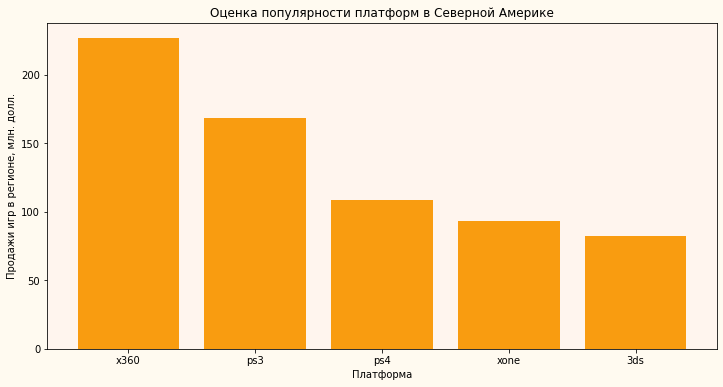

In [124]:
na_data_platform = data_platforms_2016_1.pivot_table(index='platform', values=['na_sales'], aggfunc='sum')
na_data_platform = na_data_platform.sort_values('na_sales', ascending = False).head(5)
x11= na_data_platform.index.tolist()
y11= na_data_platform['na_sales']
plot_diagram(x11,y11,'Оценка популярности платформ в Северной Америке', 'Платформа', 'Продажи игр в регионе, млн. долл.', [250 / 256, 157 / 256, 16 / 256]) 

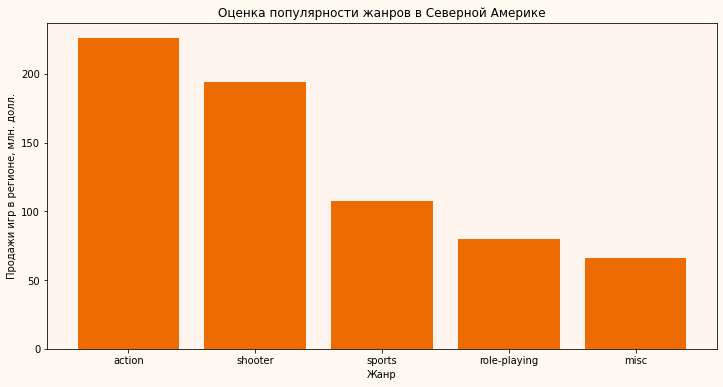

In [125]:
na_data_genre = data_platforms_2016_1.pivot_table(index='genre', values=['na_sales'], aggfunc='sum')
na_data_genre = na_data_genre.sort_values('na_sales', ascending = False).head(5)
x12= na_data_genre.index.tolist()
y12= na_data_genre['na_sales']
plot_diagram(x12,y12,'Оценка популярности жанров в Северной Америке', 'Жанр', 'Продажи игр в регионе, млн. долл.', [239 / 256, 107 / 256, 1 / 256])

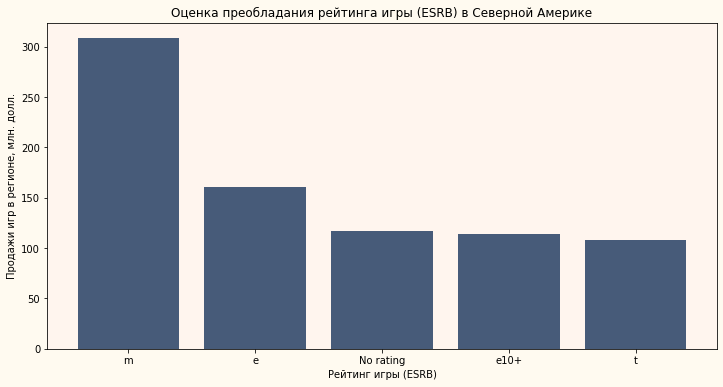

In [126]:
na_data_rating = data_platforms_2016_1.pivot_table(index='rating', values=['na_sales'], aggfunc='sum')
na_data_rating = na_data_rating.sort_values('na_sales', ascending = False).head(5)
x13= na_data_rating.index.tolist()
y13= na_data_rating['na_sales']
plot_diagram(x13,y13,'Оценка преобладания рейтинга игры (ESRB) в Северной Америке', 'Рейтинг игры (ESRB)', 'Продажи игр в регионе, млн. долл.', [71 / 256, 91 / 256, 121 / 256]) 

Наиболее популярными в Северной Америке из актуальных на 2016 год платформ по данным с 2005 года являются Microsoft Xbox 360, Sony Playstation 3, Sony Playstation 4, Microsoft Xbox One и Nintendo 3DS. 

Наиболее популярные жанры в Северной Америке: "Action", "Shooter", "Sports", "Role-Playing" и "Misc".

Преобладающим рейтингом в Северной Америке является M (Mature, 17+). Также присутствуют E (Everyone 6+), E10+ (Everyone 10+) и T (Teen 13+). Отмечается высокое количество продаж игр без рейтинга. Вероятно, эти проекты распространяются исключительно в цифровом виде и также получают рейтинг, но только в системе IARC.

Аналогично определим портрет Европейского пользователя.

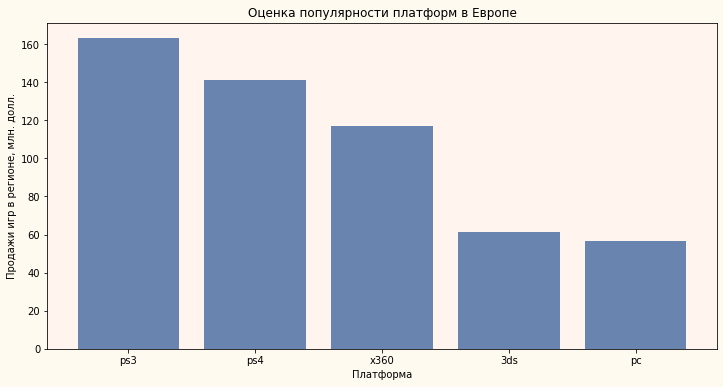

In [127]:
eu_data_platform = data_platforms_2016_1.pivot_table(index='platform', values=['eu_sales'], aggfunc='sum')
eu_data_platform = eu_data_platform.sort_values('eu_sales', ascending = False).head(5)
x14= eu_data_platform.index.tolist()
y14= eu_data_platform['eu_sales']
plot_diagram(x14,y14,'Оценка популярности платформ в Европе', 'Платформа', 'Продажи игр в регионе, млн. долл.', [105 / 256, 133 / 256, 175 / 256])

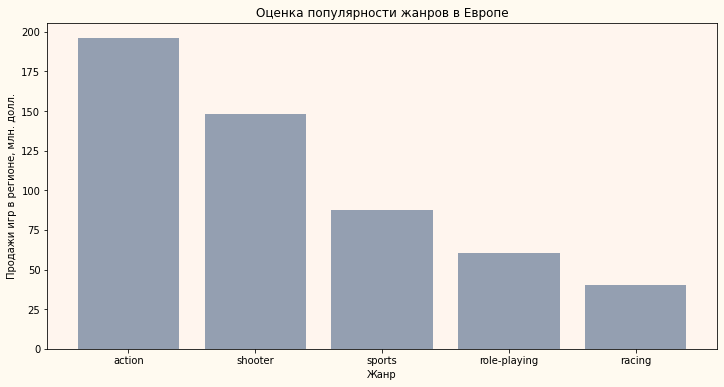

In [128]:
eu_data_genre = data_platforms_2016_1.pivot_table(index='genre', values=['eu_sales'], aggfunc='sum')
eu_data_genre = eu_data_genre.sort_values('eu_sales', ascending = False).head(5)
x15= eu_data_genre.index.tolist()
y15= eu_data_genre['eu_sales']
plot_diagram(x15,y15,'Оценка популярности жанров в Европе', 'Жанр', 'Продажи игр в регионе, млн. долл.', [149 / 256, 160 / 256, 178 / 256])

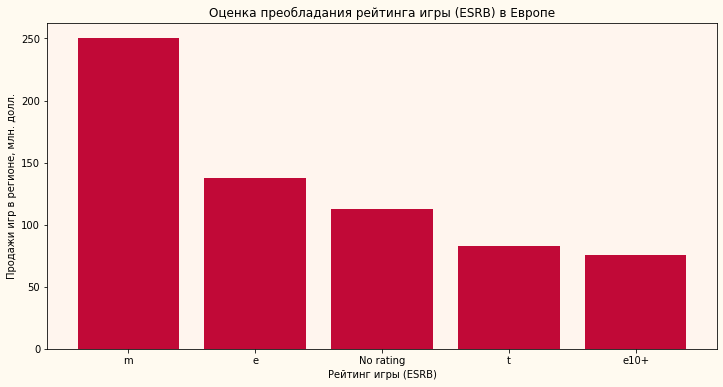

In [129]:
eu_data_rating = data_platforms_2016_1.pivot_table(index='rating', values=['eu_sales'], aggfunc='sum')
eu_data_rating = eu_data_rating.sort_values('eu_sales', ascending = False).head(5)
x16= eu_data_rating.index.tolist()
y16= eu_data_rating['eu_sales']
plot_diagram(x16,y16,'Оценка преобладания рейтинга игры (ESRB) в Европе', 'Рейтинг игры (ESRB)', 'Продажи игр в регионе, млн. долл.', [194 / 256, 9 / 256, 55 / 256]) 

Наиболее популярными в Европе из актуальных на 2016 год платформ по данным с 2005 года являются Sony Playstation 3,Sony Playstation 4, Microsoft Xbox 360, PC и Nintendo 3DS. Отметим, что к 2016 году в Европе не получила достаточного распространения новая платформа от Microsoft - Xbox One. 

Наиболее популярные жанры в Европе: "Action", "Shooter", "Sports", "Role-Playing" и "Racing".

Преобладающим рейтингом в Европе также является M (Mature, 17+). Опять же присутствуют E (Everyone 6+), E10+ (Everyone 10+) и T (Teen 13+). Учитывая тот факт, что требования рейтинга ESRB не имеют юридической силы нигде, кроме как в Северной Америке - не удивительно высокое количество продаж игр без рейтинга. Тем более, что предпочтения у Североамериканских и Европейских пользователей практически совпадают, а игры выпускают как правило одни и те же разработчики. 

Аналогично определим портрет Японского пользователя.

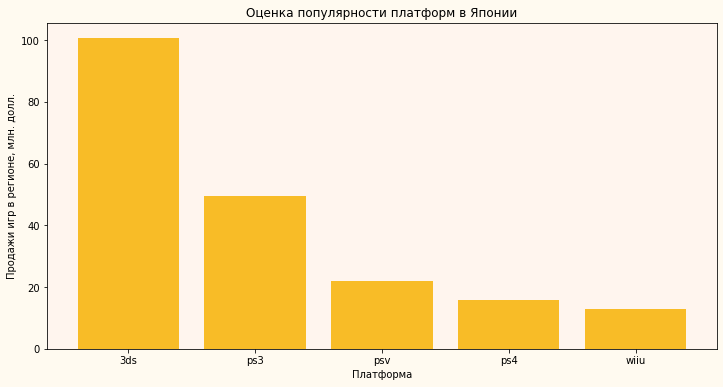

In [130]:
jp_data_platform = data_platforms_2016_1.pivot_table(index='platform', values=['jp_sales'], aggfunc='sum')
jp_data_platform = jp_data_platform.sort_values('jp_sales', ascending = False).head(5)
x17= jp_data_platform.index.tolist()
y17= jp_data_platform['jp_sales']
plot_diagram(x17,y17,'Оценка популярности платформ в Японии', 'Платформа', 'Продажи игр в регионе, млн. долл.', [249 / 256, 189 / 256, 39 / 256])

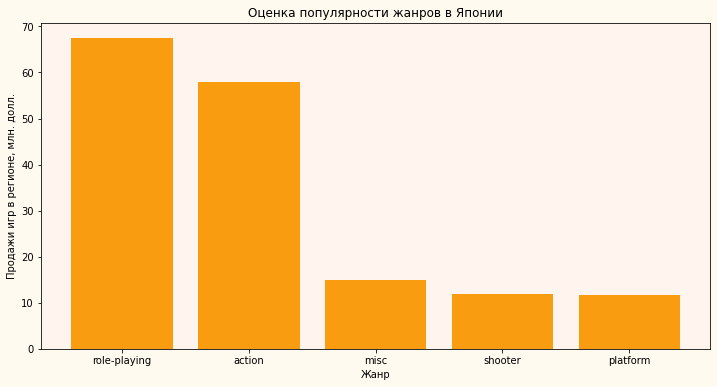

In [131]:
jp_data_genre = data_platforms_2016_1.pivot_table(index='genre', values=['jp_sales'], aggfunc='sum')
jp_data_genre = jp_data_genre.sort_values('jp_sales', ascending = False).head(5)
x18= jp_data_genre.index.tolist()
y18= jp_data_genre['jp_sales']
plot_diagram(x18,y18,'Оценка популярности жанров в Японии', 'Жанр', 'Продажи игр в регионе, млн. долл.', [250 / 256, 157 / 256, 16 / 256])

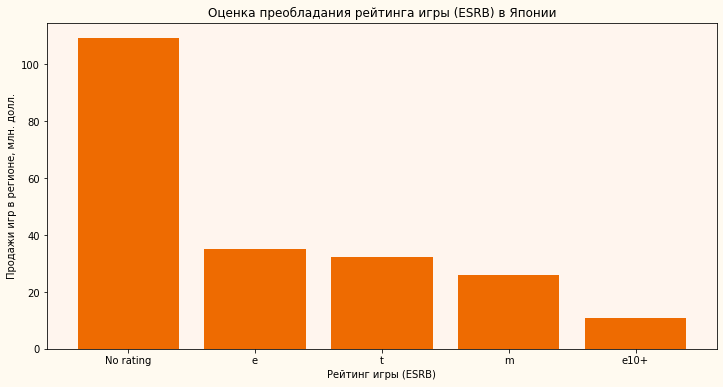

In [132]:
jp_data_rating = data_platforms_2016_1.pivot_table(index='rating', values=['jp_sales'], aggfunc='sum')
jp_data_rating = jp_data_rating.sort_values('jp_sales', ascending = False).head(5)
x19= jp_data_rating.index.tolist()
y19= jp_data_rating['jp_sales']
plot_diagram(x19,y19,'Оценка преобладания рейтинга игры (ESRB) в Японии', 'Рейтинг игры (ESRB)', 'Продажи игр в регионе, млн. долл.', [239 / 256, 107 / 256, 1 / 256]) 

Наиболее популярными в Японии из актуальных на 2016 год платформ по данным с 2005 года являются Nintendo 3DS, Sony Playstation 3, Sony Playstation Vita, Sony Playstation 4 и Nintendo Wiiu. Стоит отметить, что все эти платформы родом из Японии, что позволяет судить о предпочтениях Японцев к отечественному производителю. 

Наиболее популярные жанры в Японии: "Role-playing", "Action", "Misc", "Shooter" и "Platform".

Касательно рейтинга, в Японии наблюдается значительно иная картина.  Присутствуют M (Mature, 17+), E (Everyone 6+), E10+ (Everyone 10+) и T (Teen 13+). Однако лучше всего продаются именно игры без рейтинга. Учитывая предпочтения Японцев к игровым платформам - это и не удивительно. Скорее всего Японцы в большей мере предпочитают именно Японскиие игры, не имеющие локализации в Североамериканском регионе.

### Выводы по разделу:

1. Наиболее популярными платформами в Северной Америке являются  Microsoft Xbox 360, Sony Playstation 3, Sony Playstation 4, Microsoft Xbox One и Nintendo 3DS. Отмечается высокая популярность продуктов от Microsoft, ввиду лидирующей позиции у Xbox 360 и вхождения в Топ-5 относительно новой платформы Xbox One.
2. Наиболее популярными платформами в Европе являются Sony Playstation 3,Sony Playstation 4, Microsoft Xbox 360, PC и Nintendo 3DS. Отметим, что к 2016 году в Европе не получила достаточного распространения новая платформа от Microsoft - Xbox One. 
3. Наиболее популярными платформами в Японии являются Nintendo 3DS, Sony Playstation 3, Sony Playstation Vita, Sony Playstation 4 и Nintendo Wiiu. Стоит отметить, что все эти платформы родом из Японии, что позволяет судить о предпочтениях Японцев к отечественному производителю. 
4. Наибольшей популярностью во всех регионах пользуются жанры "Action" и "Shooter".
5. Предпочтения Европейцев и Североамериканцев по жанрам в целом схожи ("Action", "Shooter", "Sports", "Role-Playing"), отличается только последняя строчка рейтинга - "Racing" в Европе и "Misc" в Северной Америке.
6. Предпочтения Японских пользователей существенно отличаются. Возглавляет рейтинг жанр "Role-Playing", замыкает - "Platform".
7. Наибольшее влияние рейтинг ESRB оказывает влияние на продажи в Североамериканском регионе, так как именно там требования этого рейтинга являются строго обязательными к исполнению. В других же странах и регионах данный рейтинг не имеет юридической силы (подробнее в разделе 1).

## 4. Исследование статистических показателей

Проведем расчет изменения пользовательского рейтинга и рейтинга критиков для различных жанров. 
Для анализа возьмем наиболее популярные жанры во всех регионах - "Action" и "Shooter".

Рассчитаем среднюю величину, дисперсию и стандартное отклонение, а также рассмотрим распределение этих величин по годам. Дополнительно рассмотрим распределение оценок критиков и пользователей за 2015 год.

Для жанра "Action":

In [69]:
data_action = data[data['genre']=='action']
data_action = data_action.dropna(subset = ['year_of_release'])
year = data_action['year_of_release'].unique().tolist()
stat_action = pd.DataFrame(columns = ['year_of_release', 'critic_mean','critic_var','critic_std','user_mean','user_var','user_std'])
stat_action['year_of_release'] = year
stat_action = stat_action.sort_values('year_of_release')
stat_action = stat_action.reset_index()
del stat_action['index']
stat_action = stat_action.fillna(0)

In [70]:
for i in range(len(stat_action['year_of_release'])):
    iter_data = data_action[data_action['year_of_release']==stat_action['year_of_release'][i]]
    stat_action.loc[[i],['critic_mean']] = round(np.mean(iter_data['critic_score']), 2)
    stat_action.loc[[i],['critic_var']] = round(np.var(iter_data['critic_score']), 2)
    stat_action.loc[[i],['critic_std']] = round(np.std(iter_data['critic_score']), 2)
    stat_action.loc[[i],['user_mean']] = round(np.mean(iter_data['user_score']), 2)
    stat_action.loc[[i],['user_var']] = round(np.var(iter_data['user_score']), 2)
    stat_action.loc[[i],['user_std']] = round(np.std(iter_data['user_score']), 2)
stat_action.dropna()

,year_of_release,critic_mean,critic_var,critic_std,user_mean,user_var,user_std
16,1996.0,89.33,5.56,2.36,8.70,0.05,0.22
17,1997.0,86.00,1.00,1.00,8.55,0.06,0.25
18,1998.0,84.33,106.89,10.34,8.68,0.30,0.55
19,1999.0,74.00,302.80,17.40,8.30,0.38,0.62
20,2000.0,61.29,333.97,18.27,6.86,4.09,2.02
21,2001.0,67.08,313.47,17.71,7.43,3.20,1.79
22,2002.0,67.03,209.25,14.47,7.55,2.08,1.44
23,2003.0,65.61,203.96,14.28,7.52,2.95,1.72
24,2004.0,65.96,177.14,13.31,7.56,1.68,1.30
25,2005.0,68.83,161.71,12.72,7.60,1.48,1.22


Text(0, 0.5, 'Рейтинг критиков')

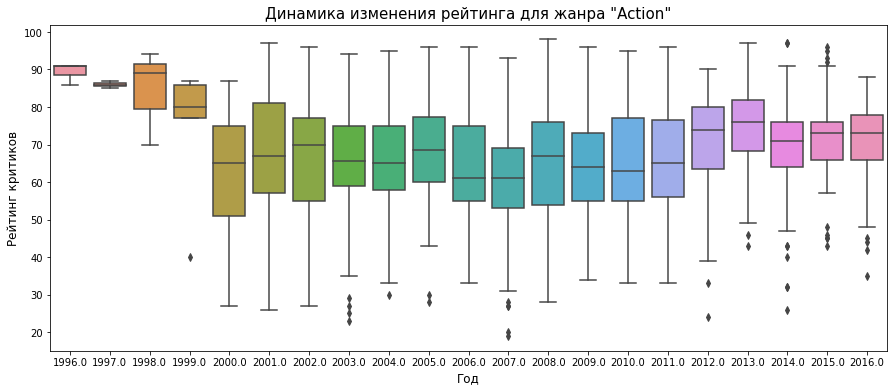

In [71]:
data_action_1 = data_action[data_action['year_of_release'] >= 1996]
plt.figure(figsize=(15,6))
sns.boxplot(data=data_action_1, x = data_action_1['year_of_release'], y=data_action_1['critic_score'])
plt.title('Динамика изменения рейтинга для жанра "Action"', fontsize=15)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Рейтинг критиков',fontsize=12)

Text(0, 0.5, 'Рейтинг пользователей')

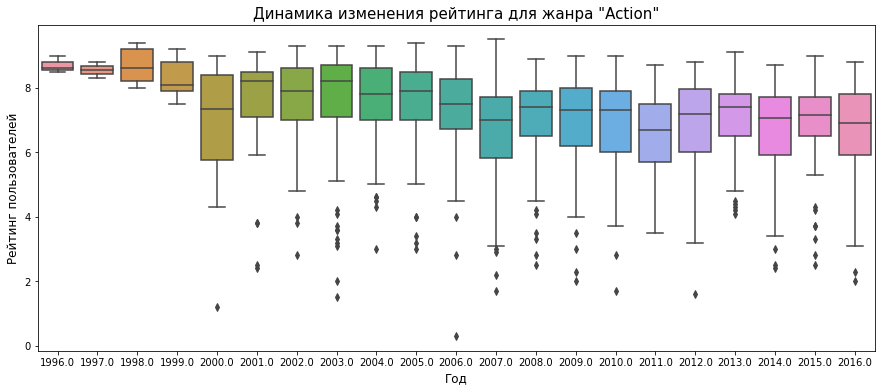

In [72]:
data_action_1 = data_action[data_action['year_of_release'] >= 1996]
plt.figure(figsize=(15,6))
sns.boxplot(data=data_action_1, x = data_action_1['year_of_release'], y=data_action_1['user_score'])
plt.title('Динамика изменения рейтинга для жанра "Action"', fontsize=15)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Рейтинг пользователей',fontsize=12)

Распределение оценок пользователей в 2015 году:

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


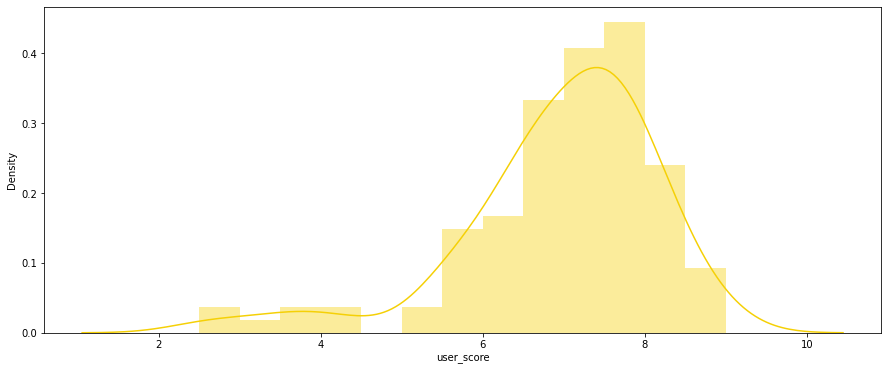

In [101]:
data_action_2 = data_action.copy()
data_action_2 = data_action_2[data_action_2['year_of_release'] == 2015]
data_action_2['user_score'] = data_action_2['user_score'].fillna(0)
sns.distplot(data_action_2[data_action_2['user_score']>0]['user_score'], color = [246 / 256, 209 / 256, 6 / 256])
plt.show()

Распределение оценок критиков в 2015 году:

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


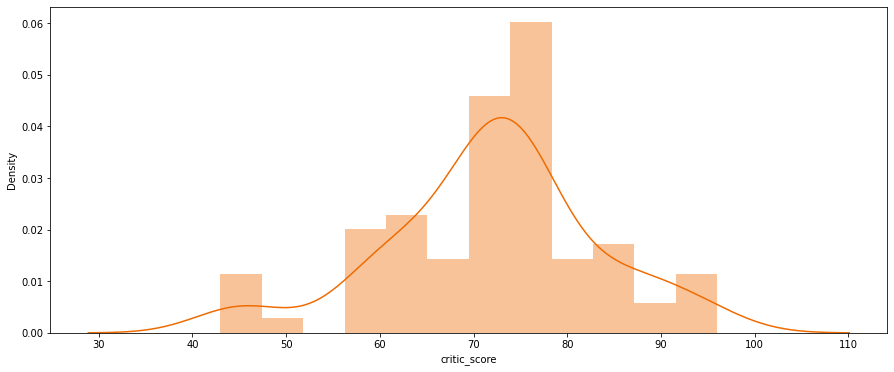

In [100]:
data_action_3 = data_action.copy()
data_action_3 = data_action_3[data_action_3['year_of_release'] == 2015]
data_action_3['critic_score'] = data_action_3['critic_score'].fillna(0)
sns.distplot(data_action_3[data_action_3['critic_score']>0]['critic_score'], color = [239 / 256, 107 / 256, 1 / 256])
plt.show()

Для жанра "Action" характерно снижение среднего значения пользовательского рейтинга с течением времени. Для значений рейтинга критиков зависимости не наблюдается.

Для жанра "Shooter":

In [75]:
data_shooter = data[data['genre']=='shooter']
data_shooter = data_shooter.dropna(subset = ['year_of_release'])
year = data_shooter['year_of_release'].unique().tolist()
stat_shooter = pd.DataFrame(columns = ['year_of_release', 'critic_mean','critic_var','critic_std','user_mean','user_var','user_std'])
stat_shooter['year_of_release'] = year
stat_shooter = stat_shooter.sort_values('year_of_release')
stat_shooter = stat_shooter.reset_index()
del stat_shooter['index']
stat_shooter = stat_shooter.fillna(0)

In [76]:
for i in range(len(stat_shooter['year_of_release'])):
    iter_data = data_shooter[data_shooter['year_of_release']==stat_shooter['year_of_release'][i]]
    stat_shooter.loc[[i],['critic_mean']] = round(np.mean(iter_data['critic_score']), 2)
    stat_shooter.loc[[i],['critic_var']] = round(np.var(iter_data['critic_score']), 2)
    stat_shooter.loc[[i],['critic_std']] = round(np.std(iter_data['critic_score']), 2)
    stat_shooter.loc[[i],['user_mean']] = round(np.mean(iter_data['user_score']), 2)
    stat_shooter.loc[[i],['user_var']] = round(np.var(iter_data['user_score']), 2)
    stat_shooter.loc[[i],['user_std']] = round(np.std(iter_data['user_score']), 2)
stat_shooter.dropna()

,year_of_release,critic_mean,critic_var,critic_std,user_mean,user_var,user_std
11,1992.0,85.00,0.00,0.00,8.20,0.00,0.00
16,1997.0,83.67,77.56,8.81,8.45,0.42,0.65
17,1998.0,77.50,210.25,14.50,8.40,0.04,0.20
19,2000.0,68.00,197.50,14.05,7.71,0.38,0.62
20,2001.0,71.29,202.79,14.24,7.40,1.40,1.18
21,2002.0,69.61,138.44,11.77,7.63,1.41,1.19
22,2003.0,70.00,164.96,12.84,7.62,1.75,1.32
23,2004.0,68.01,227.32,15.08,7.58,2.12,1.45
24,2005.0,70.49,199.00,14.11,7.63,1.95,1.40
25,2006.0,67.75,214.22,14.64,7.25,2.07,1.44


Text(0, 0.5, 'Рейтинг критиков')

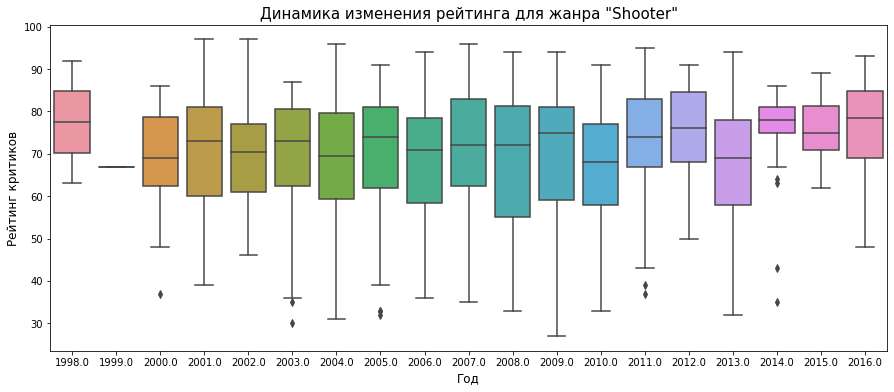

In [77]:
data_shooter_1 = data_shooter[data_shooter['year_of_release'] >= 1998]
plt.figure(figsize=(15,6))
sns.boxplot(data=data_shooter_1, x = data_shooter_1['year_of_release'], y=data_shooter_1['critic_score'])
plt.title('Динамика изменения рейтинга для жанра "Shooter"', fontsize=15)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Рейтинг критиков',fontsize=12)

Text(0, 0.5, 'Рейтинг пользователей')

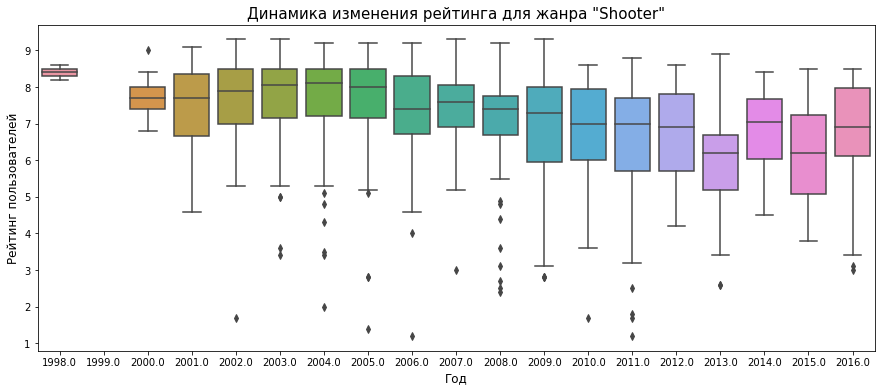

In [78]:
data_shooter_1 = data_shooter[data_shooter['year_of_release'] >= 1998]
plt.figure(figsize=(15,6))
sns.boxplot(data=data_shooter_1, x = data_shooter_1['year_of_release'], y=data_shooter_1['user_score'])
plt.title('Динамика изменения рейтинга для жанра "Shooter"', fontsize=15)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Рейтинг пользователей',fontsize=12)

Распределение оценок пользователей в 2015 году:

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


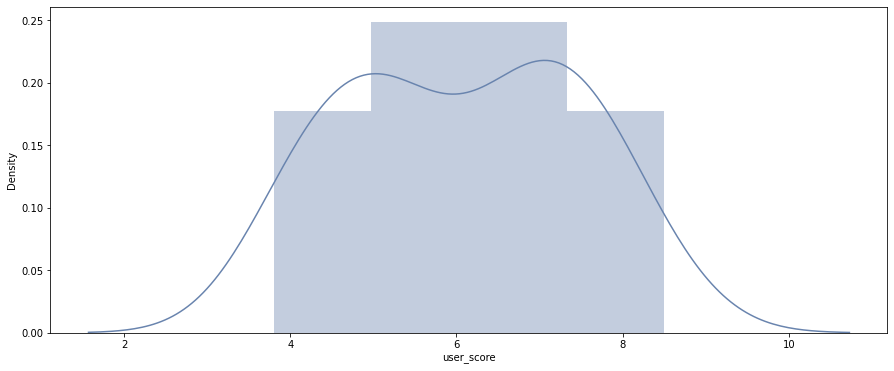

In [133]:
data_shooter_2 = data_shooter.copy()
data_shooter_2 = data_shooter_2[data_shooter_2['year_of_release'] == 2015]
data_shooter_2['user_score'] = data_shooter_2['user_score'].fillna(0)
sns.distplot(data_shooter_2[data_shooter_2['user_score']>0]['user_score'], color = [105 / 256, 133 / 256, 175 / 256])
plt.show()

Распределение оценок критиков в 2015 году:

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


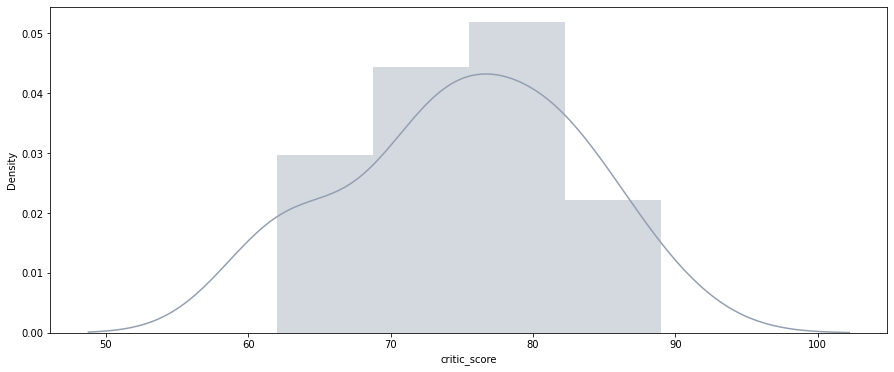

In [135]:
data_shooter_2['critic_score'] = data_shooter_2['critic_score'].fillna(0)
sns.distplot(data_shooter_2[data_shooter_2['critic_score']>0]['critic_score'], color = [149 / 256, 160 / 256, 178 / 256])
plt.show()

Как и для жанра "Action" для жанра "Shooter" не прослеживается очевидной завсимости рейтинга критиков с течением времени. Однако аналогично заметно снижение среднего значения пользовательского рейтинга. 

В 2015 году наблюдается некоторая солидарность между игроками и критиками (с учетом перевода рейтинга пользователей в 100 балльную систему или наоборот) - для обоих жанров достаточно схожи. 

### Выводы по разделу:

1. Пользовательский рейтинг (среднее значение) для расммотренных жанров "Action" и "Shooter" с годами снижается. Это может свидетельствовать как о повышении требовательности игроков, так и о снижении качества выпускаемых игр. 
2. Для рейтинга критиков не прослеживается очевидной зависимости. Вероятно, на данный параметр влияет много факторов. 
3. В 2015 году наблюдается сходесть мнений игроков и критиков в части оценок по рассмотренным жанрам.

## 5. Проверка гипотез

### 1. Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза:

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза: 

H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [81]:
xone_data = data[data['platform']=='xone']
pc_data = data[data['platform']=='pc']

Рассчитаем средний пользовательский рейтинг

Для Microsoft Xbox One:

In [82]:
xone_mean = np.mean(xone_data['user_score'])
xone_mean

6.521428571428572

Для PC:

In [83]:
pc_mean = np.mean(pc_data['user_score'])
pc_mean

7.062467532467533

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


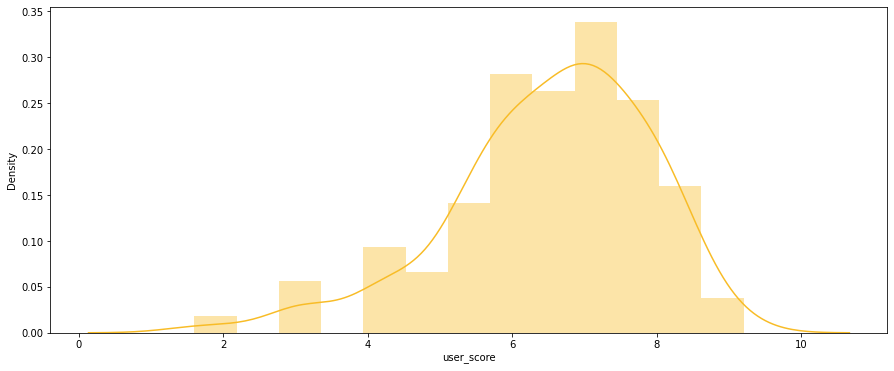

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


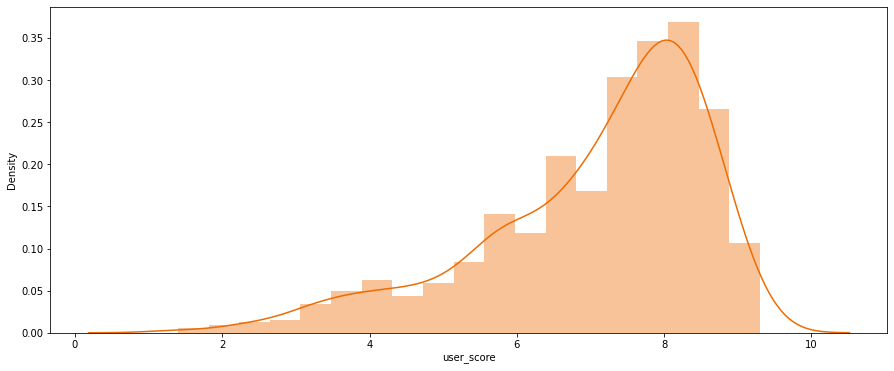

In [96]:
sns.distplot(xone_data[xone_data['user_score']>0]['user_score'], color = [249 / 256, 189 / 256, 39 / 256])
plt.show()
sns.distplot(pc_data[pc_data['user_score']>0]['user_score'], color = [239 / 256, 107 / 256, 1 / 256])
plt.show()

Мы имеем дело с нормальным распределением. Произведем проверку t-методом Стьюдента. Дисперсии выборок не равны, учтем этот факт при расчете.

Зададим значение alpha:

In [85]:
alpha = 0.01

In [86]:
results = scipy.stats.ttest_ind(xone_data[xone_data['user_score']>0]['user_score'], pc_data[pc_data['user_score']>0]['user_score'], equal_var = False)
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Нулевая гипотеза опровергнута")
else:
    print("Не получилось опровергнуть нулевую гипотезу")

p-value: 4.935072360183565e-06
Нулевая гипотеза опровергнута


Значение p-value приблизительно 4,94%. Таким образом, Нулевая гипотеза опровергнута. 

### 2. Гипотеза: средние пользовательские рейтинги жанров Action и Sports разные

Нулевая гипотеза:

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые

Альтернативная гипотеза:

H1: Средние пользовательские рейтинги жанров Action и Sports различаются

In [87]:
action_data = data[data['genre']=='action']
sports_data = data[data['genre']=='sports']

Рассчитаем средний пользовательский рейтинг

Для жанра "Action":

In [88]:
action_mean = np.mean(action_data['user_score'])
action_mean

7.054043715846995

Для жанра "Sports":

In [89]:
sports_mean = np.mean(sports_data['user_score'])
sports_mean

6.96119673617407

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


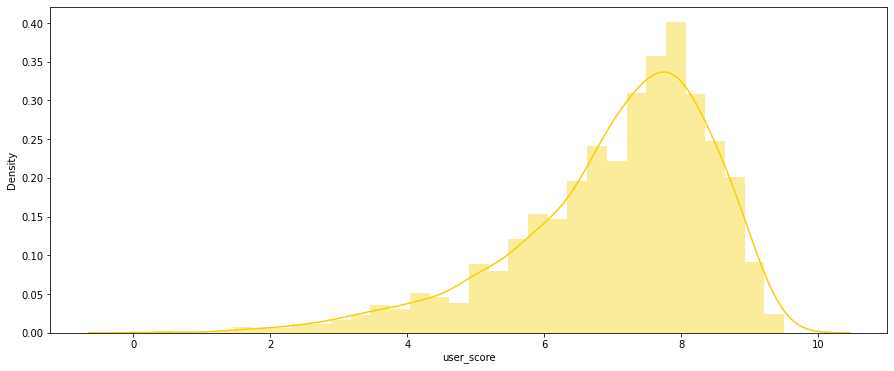

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


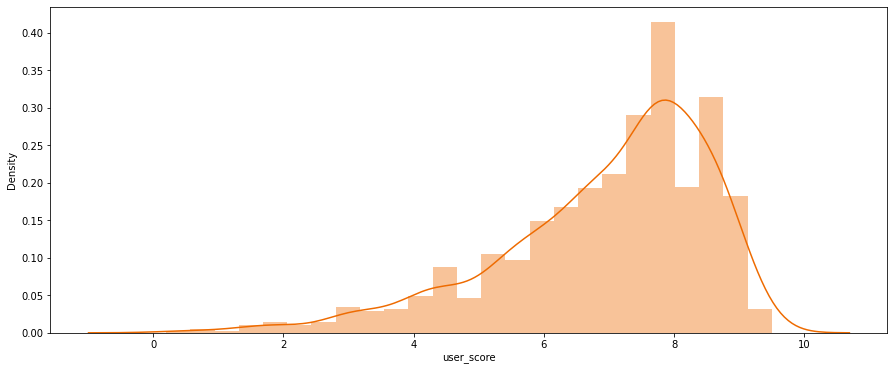

In [95]:
sns.distplot(action_data[action_data['user_score']>0]['user_score'], color = [246 / 256, 209 / 256, 6 / 256])
plt.show()
sns.distplot(sports_data[sports_data['user_score']>0]['user_score'], color = [239 / 256, 107 / 256, 1 / 256])
plt.show()

Произведем проверку t-методом Стьюдента. Дисперсии выборок не равны, учтем этот факт при расчете.

In [91]:
results = scipy.stats.ttest_ind(action_data[action_data['user_score']>0]['user_score'], sports_data[sports_data['user_score']>0]['user_score'], equal_var = False)
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Нулевая гипотеза опровергнута")
else:
    print("Не получилось опровергнуть нулевую гипотезу")

p-value: 0.11483818791498286
Не получилось опровергнуть нулевую гипотезу


Нулевая гипотеза не опровергнута. Пользовательские рейтинги для жанров Action и Sports не отличаются. 

### Выводы по разделу:

1. Первая гипотеза опровергнута - средние пользовательские рейтинги платформ Xbox One и PC отличаются.
2. Вторая гипотеза опровергнута - средние пользовательские рейтинги жанров Action и Sports не разные.

## Заключение

### Общие замечания 

В настоящее время рынок видеоигр находится в состоянии стагнации, в которое перешел еще в 2008 году в связи с развитием мобильных игр. Однако спрос на видеоигры все еще довольно велик, что прибавляет оптимизма разработчикам и дистрибьюторам. Пользователи с течением прогресса стали более требовательными, что требует от разработчиков некоторой осмотрительности. 

### Предобработка данных

1. Названия и содержание столбцов приведены к нижнему регистру.
2. Дубликатов в датасете не обнаружено.
3. Изменены типы данных для столбцов name, platform, genre и rating на тип str.
4. Для столбца 'user_score' проведена замена значений 'tbd' на пропуски. Тип данных изменен на float64.
5. Строки с пропусками в столбце 'name' удалены.
6. Пропуски в столбце 'rating' возникают как минимум по причине необязательного присваивания рейтинга для игр: выпущенных до 2000 года; не реализуемых на территории Северной Америки; распространяемых исключительно в цифровом формате.  Пропуски заменам не подвергались, строки с пропусками не удалялись.
7. Пропуски в столбцах 'user_score' и 'critic_score' до 2000 года обусловлены слабым развитием сети интернет. В общем виде же пропуски могут быть обусловлены низкой популярностью игр. Пропуски заменам не подвергались, строки с пропусками не удалялись;
8. Пропуски в столцах 'na_sales', 'eu_sales', 'jp_sales', 'other_sales' отстутствуют.
9. В столбце 'year_of_release' пропуски заменам не подвергались, строки с пропусками не удалялись.
10. В датафрейм добавлен столбец с суммарными продажами во всех регионах. 

### Исследовательский анализ данных

1. Проведенный анализ показал, что до 1993 года выпоскалось небольшое количество игр (не более 60 в год). Начиная с 1994 года количество выпускаемых в год игр начинает местами постепенно (1995-2001 гг. и 2002-2009 гг.), а местами и довольно резко (1994-1995 гг. и 2001-2002 гг.) увеличиваться. Начиная с 2011 года количество выпускаемых в год игр начинает стремительно снижаться. Количество игр выпущеных в 2015 году сопостовимо с показателями 2001 года, и более чем в два раза меньше пика значений 2008 года. 
2. Наибольшее влияние на продажи оценки критиков оказывают в Северной Америке. Наименьшее - в Японии.
3. Оценки пользователей в Японии оказывают наибольшее влияние на продажи, при этом в Европе и Северной Америке практически не оказывают. 
4. Влияние оценок вполне логично. Оценки критиков появляются до поступления игр в продажу, тем самым повышая или понижая интерес к игре. Оценки же пользователей появляются после покупки игры этим пользователями. Следовательно, оценки пользователей влияют на меньшую аудиторию, нежели оценки критиков, чем и объясняется меньшее влияние пользовательского рейтинга на продажи. 
5. Рейтинг критиков во всех случаях оказывает большее влияние на продажи чем пользовательский рейтинг. Исключение - Nintendo Wiiu. Так как данная платформа наибольшей популярностью пользуется в Японии - исключение можно объяснить высоким коэффициентом корреляции между продажами и пользовательским рейтингом у Японских игроков, отмеченного выше в матрице корреляции для PS3. 
6. Коэффициент корреляции для оценок критиков практически во всех случаях имеет один порядок (0,35-0,43). Выделяются платформы PC (0,31), Nintendo Wii (0,29) и Sony Playstation Vita (0,13).
7. Коэффициет корреляции между продажами и пользовательским рейтингом у Sony Playstation 4 и Microsoft Xbox One отрицательный и близок к нулю. Такой результат можно объяснить недавним выходом данных платформ: небольшое количество пользователей использует данные платформы, еще меньшее их число дает оценки играм и тем более меньшее число пользователей ориентируется на данные оценки.
8. Коэффициет корреляции между продажами и пользовательским рейтингом у Sony Playstation 3, Microsoft Xbox 360,Nintendo Wiiu и Wii ненулевой и положительный, что может свидетельствовать о том, что пользователи ориентируются на мнения других игроков при покупке игр. 
9. Коэффициет корреляции между продажами и пользовательским рейтингом у Sony Playstation Vita и PC близки к нулевым значениям. 
10. Низкие значения коэффициентов корреляции между рейтингами и продажами для Sony Playstation Vita можно объяснить ограниченным количеством игр для данной платформы. У пользователя с ограниченным выбором отстутсвует возможность отклонить покупку игры из-за ее рейтинга. 

### Составление портретов пользователей из различных регионов

1. Наиболее популярными платформами в Северной Америке являются  Microsoft Xbox 360, Sony Playstation 3, Sony Playstation 4, Microsoft Xbox One и Nintendo 3DS. Отмечается высокая популярность продуктов от Microsoft, ввиду лидирующей позиции у Xbox 360 и вхождения в Топ-5 относительно новой платформы Xbox One.
2. Наиболее популярными платформами в Европе являются Sony Playstation 3,Sony Playstation 4, Microsoft Xbox 360, PC и Nintendo 3DS. Отметим, что к 2016 году в Европе не получила достаточного распространения новая платформа от Microsoft - Xbox One. 
3. Наиболее популярными платформами в Японии являются Nintendo 3DS, Sony Playstation 3, Sony Playstation Vita, Sony Playstation 4 и Nintendo Wiiu. Стоит отметить, что все эти платформы родом из Японии, что позволяет судить о предпочтениях Японцев к отечественному производителю. 
4. Наибольшей популярностью во всех регионах пользуются жанры "Action" и "Shooter".
5. Предпочтения Европейцев и Североамериканцев по жанрам в целом схожи ("Action", "Shooter", "Sports", "Role-Playing"), отличается только последняя строчка рейтинга - "Racing" в Европе и "Misc" в Северной Америке.
6. Предпочтения Японских пользователей существенно отличаются. Возглавляет рейтинг жанр "Role-Playing", замыкает - "Platform".
7. Наибольшее влияние рейтинг ESRB оказывает влияние на продажи в Североамериканском регионе, так как именно там требования этого рейтинга являются строго обязательными к исполнению. В других же странах и регионах данный рейтинг не имеет юридической силы.

### Статистический анализ данных

1. Пользовательский рейтинг (среднее значение) для расммотренных жанров "Action" и "Shooter" с годами снижается. Это может свидетельствовать как о повышении требовательности игроков, так и о снижении качества выпускаемых игр. 
2. Для рейтинга критиков не прослеживается очевидной зависимости. Вероятно, на данный параметр влияет много факторов. 
3. В 2015 году наблюдается сходесть мнений игроков и критиков в части оценок по рассмотренным жанрам.

### Проверка гипотез

1. Первая гипотеза опровергнута - средние пользовательские рейтинги платформ Xbox One и PC отличаются.
2. Вторая гипотеза опровергнута - средние пользовательские рейтинги жанров Action и Sports не разные.

### Рекомендации для компании

При планировании рекламной кампании на 2017 год следует учесть актуальные и наиболее прибыльные платформы (Sony Playstation 4, Microsoft Xbox One и Nintendo 3DS). Универсальным для каждого региона станет продвижение игр в жанрах "Action" и "Shooter". При выборе игр для продвижения  во всех регионах следует обязательно учесть рейтинги критиков, а в Японии - пользовательские рейтинги.  
